# content:

## 0- Importing libraries & Acquiring Data
## 1- تنظيف البيانات
## 2- التحليل الاستكشافي
## 3- التحليل التشخيصي

## ***Importing libraries & Acquiring Data***

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

import re 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Data.csv')
print(df.shape)
df.head(3)

(1189, 47)


,طابع زمني,الاسم الكريم ؟,رقم الجوال :,المستوى التدريبي :,التخصص التدريبي,العمر ؟ 📝,الجنسية ؟,هل لديك عمل بعد التدريب ؟,هل لديك عمل أثناء وقت التدريب ؟,المعدل التراكمي لمن اجتاز المستوى الأول,ما الهدف الأساسي لدخولك للكلية التقنية ؟,هل دخلت التخصص المناسب لك ؟,هل دخلت التخصص الذي ترغب فيه ؟,هل أجريت مقياس للميول المهني قبل الدخول للكلية لمعرفة التخصصات المناسبة ؟,ما المقياس الذي أجريته ؟,هل دخلت دورة في اختيار التخصص قبل الدخول في الكلية ؟,هل التخصصات في الكلية واضحة المعالم بحيث تعرف ما الذي تأخذه في التدريب قبل الدخول ؟,هل معايير تغيير التخصص واضحة لك ؟,هل كان دخولك بالكلية :,هل تعرف مجالات العمل بعد التخرج ؟,هل تخصصك مناسب لميولك وقدراتك ؟,هل نظام الكلية واضح من حيث تغيير التخصص من تخصص لآخر ؟,هل معايير التنقل بين التخصصات واضحة ؟,مدى الاستفادة من خدمات الإرشاد المهني بالكلية ؟,ما تقيييمك لنفسك في المهارات الأساسية التالية : [الإلقاء],ما تقيييمك لنفسك في المهارات الأساسية التالية : [القيادة],ما تقيييمك لنفسك في المهارات الأساسية التالية : [التفكير الناقد],ما تقيييمك لنفسك في المهارات الأساسية التالية : [مهارات التواصل],ما تقيييمك لنفسك في المهارات الأساسية التالية : [المرونة ],ما تقيييمك لنفسك في المهارات الأساسية التالية : [مهارات الحاسب والتقنية],ما تقيييمك لنفسك في المهارات الأساسية التالية : [مهارات معرفة الذات],ما تقيييمك لنفسك في المهارات الأساسية التالية : [مهارة القرآءة ],ما تقيييمك لنفسك في المهارات الأساسية التالية : [مهارة الكتابة ],ما تقيييمك لنفسك في المهارات الأساسية التالية : [مهارة التفكير الإبداعي],ما تقيييمك لنفسك في المهارات الأساسية التالية : [مهارة التعاون والتشارك],ما تقيييمك لنفسك لهذه الجدارات والاحتياجات : [معرفة برنامج الوورد والاكسل],ما تقيييمك لنفسك لهذه الجدارات والاحتياجات : [معرفة برنامج البوربينت],ما تقيييمك لنفسك لهذه الجدارات والاحتياجات : [معرفة إدارة المشاريع],ما تقيييمك لنفسك لهذه الجدارات والاحتياجات : [معرفة كتابة السيرة الذاتية],ما تقيييمك لنفسك لهذه الجدارات والاحتياجات : [معرفة مهارات البحث عن الوظيفة],ما تقيييمك لنفسك لهذه الجدارات والاحتياجات : [معرفة سوق العمل],ما أبرز المشكلات التي تمر عليك في حياتك ؟,ما أبرز المشكلات التي مرت عليك أثناء التدريب ؟,ما أهم الاحتياجات التي تحتاجها من الكلية ؟,عناوين دورات تراها مهمة جدا عن :,أبرز نقاط قوتك الشخصية,مقترحات و أفكار أخرى تقترحها
0,2023/01/08 7:46:44 م غرينتش+3,محمد فهد الدوسري,0559755544,الأول,‏⊶7️⃣ تقنية القوى الكهربائية,37,سعودي,نعم,لا,5.0,الشهادة;الترقية;الدراسة,نعم,نعم,لا,NaN,لا,لا,نعم,اختياري,نعم,نعم,نعم,نعم,3,متقن,متقن,متقن,متقن,متقن,متوسط الاتقان,متوسط الاتقان,متقن,متقن,متقن جدا,متقن جدا,متقن جدا,متقن,متقن جدا,متقن,متقن,متقن,ظيق الوقت,ترتيب الوقت,ترتيب مواعيد المحاضرات,معرفة الذات,الاصرار,ا
1,2023/01/08 7:48:34 م غرينتش+3,صالح,0559575785,الأول,‏⊶7️⃣ تقنية القوى الكهربائية,25,سعودي,نعم,لا,4.0,الشهادة;اضطرارا,لا,لا,لا,NaN,لا,ربما,لا,اضطراري,لا,نعم,لا,لا,4,متوسط الاتقان,متقن,متوسط الاتقان,متقن,متقن,متقن,متقن,متوسط الاتقان,متقن,متوسط الاتقان,متقن,متوسط الاتقان,متوسط الاتقان,متوسط الاتقان,متوسط الاتقان,غير متقن,غير متقن,الضغط,الضغط,المرونه,العلاقات;المال;العمل,متفهم,لا يوجد
2,2023/01/08 7:49:10 م غرينتش+3,عبدالعزيز جهاد الشاعر,0532025847,الأول,‏⊶7️⃣ تقنية القوى الكهربائية,19,غير سعودي,نعم,لا,5.0,الشهادة;شغف وحب;الدراسة,نعم,نعم,نعم,P,لا,نعم,نعم,اضطراري,نعم,نعم,نعم,نعم,5,متوسط الاتقان,متقن جدا,متقن جدا,متقن جدا,متقن جدا,متقن جدا,متقن جدا,متقن جدا,متقن جدا,متقن جدا,متقن جدا,متقن جدا,متقن جدا,متقن جدا,متقن جدا,متقن جدا,متقن جدا,عدم توفر المال,ضغوط في العمل,توفير الكتب وسبل الراحه,معرفة الذات;العلاقات;المستقبل,شخصيه قويه,لا يوجد شيء


In [2]:
dff = pd.read_csv('dd.csv')
print(dff.shape)
dff = dff.T

(1, 9)


In [20]:
dff

,0
المواقف,11
الاكل,1
القاعات,5
المكافأة,4
المهندسين,1
المتدربين,3
الموقع,6
المكتبة,2
الكلية,5


In [9]:
def Pie_count(data=dff, field='Nationality', title=None, percent_limit=0.5):
    
    title
    # data[field] = data[field].fillna('NA')
    data = data[field].value_counts().to_frame()
    
    total = data[field].sum()
    data['percentage'] = 100 * data[field]/total

    percent_limit = percent_limit
    otherdata = data[data['percentage'] < percent_limit]
    others = otherdata['percentage'].sum()
    maindata = data[data['percentage'] >= percent_limit]

    data = maindata
    other_label = 'Others(<' + str(percent_limit) + '% each'
    data.loc[other_label] = pd.Series({field:otherdata[field].sum()})


    labels = data.index.tolist()
    datavals = data[field].tolist()

    trace = go.Pie(labels = labels,
                   values = datavals
                   )

    layout = go.Layout(
        title= title,
        height=700,
        width=700,
        # paper_bgcolor='rgba(152, 247, 217, 0.21)',
    )
    
    fig = go.Figure(data=[trace], layout= layout)
    fig.show()

In [25]:
px.pie(dff, dff.index, 0)

In [3]:
df.columns

Index(['طابع زمني', 'الاسم الكريم ؟', 'رقم الجوال : ', 'المستوى التدريبي : ',
       'التخصص التدريبي ', 'العمر ؟ 📝', 'الجنسية  ؟',
       'هل لديك عمل بعد التدريب ؟', 'هل لديك عمل أثناء وقت التدريب ؟',
       'المعدل التراكمي لمن اجتاز المستوى الأول',
       'ما الهدف الأساسي لدخولك للكلية التقنية ؟',
       'هل دخلت التخصص المناسب لك  ؟', 'هل دخلت التخصص الذي ترغب فيه  ؟',
       'هل أجريت مقياس للميول المهني قبل الدخول للكلية لمعرفة التخصصات المناسبة   ؟',
       'ما المقياس الذي أجريته ؟',
       'هل دخلت دورة في اختيار التخصص قبل الدخول في الكلية ؟',
       'هل التخصصات في الكلية واضحة المعالم بحيث تعرف ما الذي تأخذه في التدريب قبل الدخول ؟',
       'هل معايير تغيير التخصص واضحة لك ؟', 'هل كان دخولك بالكلية : ',
       'هل تعرف مجالات العمل بعد التخرج ؟', 'هل تخصصك مناسب لميولك وقدراتك ؟',
       'هل نظام الكلية واضح من حيث تغيير التخصص من تخصص لآخر ؟',
       'هل معايير التنقل بين التخصصات واضحة ؟',
       'مدى الاستفادة من خدمات الإرشاد المهني بالكلية ؟',
       'ما تقيييمك لنفس

## ***تنظيف البيانات***

In [3]:
df.columns = ['drop2', 'name', 'drop1', 'level','specialization', 'age', 'nation','work after', 'work with','average','main goal',
       'right specialty?', 'wanted specialty','conducted a measure','What measure','enter a course',
       'majors in the college clear-cut','criteria for changing clear', 'your admission','work after graduation',
       'specialty and abilities?','college system of changing majors','moving between disciplines','career services',
       'speaking','leadership','critical thinking','communication','flexibility','technical','self-knowledge','reading','writing',
       'creative thinking','Collaboration and sharing','word-ex','powerp','project mangement','cv','search for jobs','Knowledge labor market',
       'live problems','problems during training?','needs from college','important courses', 'personal strengths','Suggestions']

In [4]:
df = df.drop(['drop2','drop1'], axis=1)

In [5]:
df =      df[['name', 'age', 'nation',  'specialization','level', 'work after',
              'work with', 'average', 'main goal', 'right specialty?',
              'wanted specialty', 'conducted a measure', 'What measure',
              'enter a course', 'personal strengths','work after graduation', 'specialty and abilities?','your admission',
              'speaking', 'leadership', 'critical thinking',
              'communication', 'flexibility', 'technical', 'self-knowledge',
              'reading', 'writing', 'creative thinking', 'Collaboration and sharing',
              'word-ex', 'powerp', 'project mangement', 'cv', 'search for jobs',
              'Knowledge labor market', 
              
              
              'majors in the college clear-cut','criteria for changing clear', 
              'college system of changing majors', 'moving between disciplines',
              'career services', 
              
              
              'live problems', 'problems during training?','important courses', 'needs from college', 
              'Suggestions']]

In [6]:
df.age.unique()

array(['37', '25', '19', '20', '30', '26', '22', '23', '21', '27', '40',
       '٢٧', '٢٣', '.', '18', '١٩', '٢٠', '34', '24', '٤٠', '١٨', '19 ',
       '20\n', '٢١', '39', '٢٢', '31', '29', '38', '43', '28', '36',
       '23 ', '32', '22سنة', '33', '47', '24سنة', '19او ٢٠', ' 20', '٢٤',
       '22 سنة ', '20 سنه', '20سنه', '35', '19\n', '17', '20 سنة', '23\n'],
      dtype=object)

In [7]:
a = {
        '37':'37',
        '25':'25',
        '19':'19',
        '20':'20',
        '30':'30',
        '26':'26',
        '22':'22',
        '23':'23',
        '21':'21',
        '27':'27',
        '40':'40',
        '.':'29',
        '18':'18',
        '34':'34',
        '24':'24',
        '19':'19',
        '39':'39',
        '31':'31',
        '29':'29',
        '38':'38',
        '43':'43',
        '28':'28',
        '36':'36',
        '23':'23',
        '32':'32',
        '33':'33',
        '٢٣':'23',
        '٢٧':'27',
        '٢٠':'20',
        '١٩':'19',
        '١٨':'18',
        '٤٠':'40',
        '20\\n':'20',
        '٢١':'21',
        '2247':'22',
        'سنة':'29',
        ', ':'25',
        '22٢٤':'22',
        ' 20':'20',
        '19او ٢٠':'20',
        '24سنة':'24',
        '47':'47',
        '33':'33',
        'سنة':'25',
        '22 19':'20',
        '35':'35',
        '20سنه':'20',
        '20 سنه':'20',
        ' سنة\\n':'25',
        'سنة\\n':'25',
        '17':'17',
        '20 23':'22',
    }
b = {
    'الأول':'الأول',
    'الثالث':'الثالث',
    'الثاني':'الثاني',
    'الخامس':'الخامس',
    'الرابع':'الرابع',
    'السادس':'السادس',
    'السابع':'السابع',
    'مابين الرابع والخامس':'الرابع',
    'الثامن':'الثامن',
    'السابع ':'السابع',
    'خريج':'الثامن',
    'الترم الاول':'الأول',
    '1':'الأول',
    '\u200fالسابع':'السابع',
    'الترم الاول':'الأول',
    '8':'الثامن',
    'لايوجد':'الثامن',
    'الثامن ':'الثامن',
    'مستجد ':'الأول',
    'اول ترم':'الأول',
    '7':'السابع',
    'العاشر':'الثامن',
    'تطبيقي':'الأول',
    '٧':'السابع',
    'الرابع خريج اخر ترم':'الرابع',
    'الاخر':'الثامن',
    }
df.age = df.age.map(a)
df.level = df.level.map(b)

In [8]:
df.age.value_counts()

19    327
20    285
18    175
21    159
22     86
23     56
24     26
25     12
26      9
27      6
28      5
40      4
37      3
17      3
29      3
30      3
33      2
34      2
39      1
31      1
38      1
43      1
36      1
32      1
47      1
35      1
Name: age, dtype: int64

In [9]:
df.level.unique()

array(['الأول', 'الثالث', 'الرابع', 'الخامس', 'الثاني', 'السادس',
       'الثامن', 'السابع', nan], dtype=object)

In [10]:
df.average.mean()

3.3037433155080214

In [11]:
df.age = df.age.fillna('29')
df.age = df.age.astype(int)
df.average = df.average.fillna(3)
df.level = df.level.fillna('الأول')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   name                               1189 non-null   object 
 1   age                                1189 non-null   int64  
 2   nation                             1189 non-null   object 
 3   specialization                     1189 non-null   object 
 4   level                              1189 non-null   object 
 5   work after                         1189 non-null   object 
 6   work with                          1189 non-null   object 
 7   average                            1189 non-null   float64
 8   main goal                          1189 non-null   object 
 9   right specialty?                   1189 non-null   object 
 10  wanted specialty                   1189 non-null   object 
 11  conducted a measure                1189 non-null   objec

<AxesSubplot:>

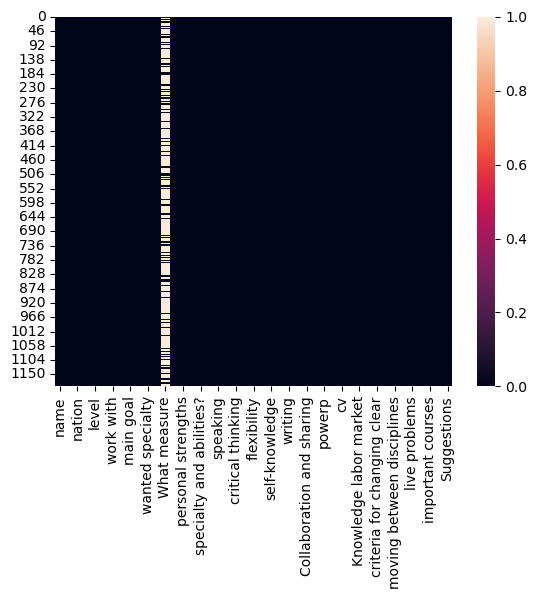

In [15]:
sns.heatmap(df.isna())

## ***تحليل استكشافي***

### استكشاف الطلاب

#### ***الرسوم البيانية***

In [14]:
df.describe().T.style.background_gradient(cmap = "Oranges")

,count,mean,std,min,25%,50%,75%,max
age,1189.000000,20.530698,3.046239,17.000000,19.000000,20.000000,21.000000,47.000000
average,1189.000000,3.238856,0.822743,1.000000,3.000000,3.000000,4.000000,5.000000
career services,1189.000000,3.347351,1.323049,1.000000,3.000000,3.000000,5.000000,5.000000


In [15]:
pd.DataFrame(df.average.describe().round(2)).T.style.background_gradient(cmap = "Oranges")

,count,mean,std,min,25%,50%,75%,max
average,1189.000000,3.240000,0.820000,1.000000,3.000000,3.000000,4.000000,5.000000


In [16]:
pd.DataFrame(df.groupby('specialization')['right specialty?'].value_counts())

right specialty?
specialization                        right specialty?                  
‏⊶1️⃣ تقنية الدعم الفني للحاسب        نعم                             87
                                      ربما                            42
                                      لا                              10
‏⊶2️⃣ تقنية شبكات الحاسب              نعم                            101
                                      ربما                            27
                                      لا                               4
‏⊶3️⃣ تقنية الإلكترونيات أنظمة التحكم نعم                             65
                                      ربما                            47
                                      لا                              27
‏⊶4️⃣ تقنية المحركات والمركبات        نعم                             96
                                      ربما                            16
                                      لا                               4
‏⊶5️⃣ تقنيات الاعمال المكتبية         نعم                            117
                                      ربما                            55
                                      لا                              25
‏⊶6️⃣ تقنيات محاسبية                  نعم                             69
                                      ربما                            57
                                      لا                              18
‏⊶7️⃣ تقنية القوى الكهربائية          نعم                            163
                                      ربما                            75
                                      لا                              26
‏⊶8️⃣ تقنية الآلات الكهربائية         نعم                             36
                                      ربما                            18
                                      لا                               4

In [17]:
fig = px.sunburst(df, 
                   path=['specialization', 'right specialty?'], 
                   values='age', template='plotly_white',
                 )
fig.update_layout(title_text='هل دخلت التخصص المناسب لك ؟ (بناء على التخصص)', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=28, 
                            family="Courier New, monospace",),
                  width=900,
                  height=900,
                  showlegend=False,
                
                 )
fig.show()

In [18]:
pd.DataFrame(df.groupby('specialization')['wanted specialty'].value_counts())

wanted specialty
specialization                        wanted specialty                  
‏⊶1️⃣ تقنية الدعم الفني للحاسب        نعم                             84
                                      ربما                            33
                                      لا                              22
‏⊶2️⃣ تقنية شبكات الحاسب              نعم                             96
                                      ربما                            28
                                      لا                               8
‏⊶3️⃣ تقنية الإلكترونيات أنظمة التحكم نعم                             55
                                      ربما                            45
                                      لا                              39
‏⊶4️⃣ تقنية المحركات والمركبات        نعم                             87
                                      ربما                            21
                                      لا                               8
‏⊶5️⃣ تقنيات الاعمال المكتبية         نعم                            111
                                      لا                              46
                                      ربما                            40
‏⊶6️⃣ تقنيات محاسبية                  نعم                             62
                                      ربما                            53
                                      لا                              29
‏⊶7️⃣ تقنية القوى الكهربائية          نعم                            169
                                      ربما                            59
                                      لا                              36
‏⊶8️⃣ تقنية الآلات الكهربائية         نعم                             33
                                      ربما                            17
                                      لا                               8

In [19]:
fig = px.sunburst(df, 
                   path=['specialization', 'wanted specialty'], 
                   values='age', template='plotly_white',
                 )
fig.update_layout(title_text='هل دخلت التخصص الذي ترغب فيه ؟	 (بناء على التخصص)', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=28, 
                            family="Courier New, monospace",),
                  width=900,
                  height=900,
                  showlegend=False,
                
                 )
fig.show() 

In [20]:
print('الجنسية \n',df.nation.value_counts())
print('-'*50)
print(df.age.value_counts().head(7))
print('-'*100)
print(df.specialization.value_counts())
print('-'*100)

الجنسية 
 سعودي        1178
غير سعودي      11
Name: nation, dtype: int64
--------------------------------------------------
19    327
20    285
18    175
21    159
22     86
23     56
24     26
Name: age, dtype: int64
----------------------------------------------------------------------------------------------------
‏⊶7️⃣ تقنية القوى الكهربائية             264
‏⊶5️⃣ تقنيات الاعمال المكتبية            197
‏⊶6️⃣ تقنيات محاسبية                     144
‏⊶3️⃣ تقنية الإلكترونيات أنظمة التحكم    139
‏⊶1️⃣ تقنية الدعم الفني للحاسب           139
‏⊶2️⃣ تقنية شبكات الحاسب                 132
‏⊶4️⃣ تقنية المحركات والمركبات           116
‏⊶8️⃣ تقنية الآلات الكهربائية             58
Name: specialization, dtype: int64
----------------------------------------------------------------------------------------------------


In [13]:
df.columns

Index(['name', 'age', 'nation', 'specialization', 'level', 'work after',
       'work with', 'average', 'main goal', 'right specialty?',
       'wanted specialty', 'conducted a measure', 'What measure',
       'enter a course', 'personal strengths', 'work after graduation',
       'specialty and abilities?', 'your admission', 'speaking', 'leadership',
       'critical thinking', 'communication', 'flexibility', 'technical',
       'self-knowledge', 'reading', 'writing', 'creative thinking',
       'Collaboration and sharing', 'word-ex', 'powerp', 'project mangement',
       'cv', 'search for jobs', 'Knowledge labor market',
       'majors in the college clear-cut', 'criteria for changing clear',
       'college system of changing majors', 'moving between disciplines',
       'career services', 'live problems', 'problems during training?',
       'important courses', 'needs from college', 'Suggestions'],
      dtype='object')

In [28]:
print('هل التخصصات في الكلية واضحة المعالم بحيث تعرف ما الذي تأخذه في التدريب قبل الدخول ؟')
print(df['majors in the college clear-cut'].value_counts())
print()
print('العلاقة بين وضوح معالم التخصص ودخول التخصص المناسب')
pd.DataFrame(df.groupby('majors in the college clear-cut')['right specialty?'].value_counts())

هل التخصصات في الكلية واضحة المعالم بحيث تعرف ما الذي تأخذه في التدريب قبل الدخول ؟
نعم     717
ربما    300
لا      172
Name: majors in the college clear-cut, dtype: int64

العلاقة بين وضوح معالم التخصص ودخول التخصص المناسب


right specialty?
majors in the college clear-cut right specialty?                  
ربما                            نعم                            149
                                ربما                           118
                                لا                              33
لا                              نعم                             82
                                ربما                            55
                                لا                              35
نعم                             نعم                            503
                                ربما                           164
                                لا                              50

In [29]:
print('العلاقة بين وضوح معالم التخصص ودخول التخصص المرغوب')
pd.DataFrame(df.groupby('majors in the college clear-cut')['wanted specialty'].value_counts())

العلاقة بين وضوح معالم التخصص ودخول التخصص المرغوب


wanted specialty
majors in the college clear-cut wanted specialty                  
ربما                            نعم                            141
                                ربما                           106
                                لا                              53
لا                              نعم                             77
                                لا                              55
                                ربما                            40
نعم                             نعم                            479
                                ربما                           150
                                لا                              88

In [34]:
fig = px.sunburst(df, 
                   path=['majors in the college clear-cut', 'right specialty?'], 
                   template='plotly_white',
                 )
fig.update_layout(title_text='العلاقة بين وضوح معالم التخصص ودخول التخصص المناسب', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=20, 
                            family="Courier New, monospace",),
                  width=800,
                  height=700,
                  showlegend=False,
                
                 )
fig.show()
fig = px.sunburst(df, 
                   path=['majors in the college clear-cut', 'wanted specialty'], 
                   template='plotly_white',
                 )
fig.update_layout(title_text='العلاقة بين وضوح معالم التخصص ودخول التخصص المرغوب', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=20, 
                            family="Courier New, monospace",),
                  width=800,
                  height=700,
                  showlegend=False,
                
                 )
fig.show()

In [21]:
def Pie_count(data=df, field='Nationality', title=None, percent_limit=0.5):
    
    title
    # data[field] = data[field].fillna('NA')
    data = data[field].value_counts().to_frame()
    
    total = data[field].sum()
    data['percentage'] = 100 * data[field]/total

    percent_limit = percent_limit
    otherdata = data[data['percentage'] < percent_limit]
    others = otherdata['percentage'].sum()
    maindata = data[data['percentage'] >= percent_limit]

    data = maindata
    other_label = 'Others(<' + str(percent_limit) + '% each'
    data.loc[other_label] = pd.Series({field:otherdata[field].sum()})


    labels = data.index.tolist()
    datavals = data[field].tolist()

    trace = go.Pie(labels = labels,
                   values = datavals
                   )

    layout = go.Layout(
        title= title,
        height=700,
        width=700,
        # paper_bgcolor='rgba(152, 247, 217, 0.21)',
    )
    
    fig = go.Figure(data=[trace], layout= layout)
    fig.show()

In [22]:
Pie_count(df,'right specialty?', 'هل دخلت التخصص المناسب لك ؟')
Pie_count(df,'wanted specialty', 'هل دخلت التخصص الذي ترغب فيه ؟')

In [23]:
df[(df['your admission'] == 'اختياري') & (df['right specialty?'] == 'نعم')].shape

(669, 45)

In [24]:
fig = px.sunburst(df, 
                   path=['criteria for changing clear', 'wanted specialty'], 
                   template='plotly_white',
                 )
fig.update_layout(title_text='العلاقة بين وضوح معايير تغيير التخصص ودخول التخصص المرغوب به', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=28, 
                            family="Courier New, monospace",),
                  width=1100,
                  height=900,
                  showlegend=False,
                
                 )
fig.show()

In [25]:
fig = px.sunburst(df, 
                   path=['your admission', 'wanted specialty'], 
                   template='plotly_white',
                 )
fig.update_layout(title_text='قياس رغبته في التخصص مع اضطرارية او اختيارية دخوله للكلية', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=28, 
                            family="Courier New, monospace",),
                  width=1000,
                  height=900,
                  showlegend=False,
                
                 )
fig.show()

#### ***العمل مع & العمل بعد***

In [26]:
Pie_count(df,'work with', 'هل لديك عمل أثناء وقت التدريب ؟')
Pie_count(df,'work after', 'هل لديك عمل بعد التدريب ؟')

In [27]:
print(df['work with'].value_counts())

لا     1110
نعم      79
Name: work with, dtype: int64


In [28]:
pd.DataFrame(df.groupby('work with')['average'].mean().round(2).sort_values(ascending=False))

,average
work with,
نعم,3.37
لا,3.23


In [29]:
pd.DataFrame(df.groupby('work after')['average'].mean().round(2).sort_values(ascending=False))

,average
work after,
نعم,3.27
لا,3.23


#### ***الهدف الاساسي من الدراسة***

In [17]:
df['main goal'] = df['main goal'].apply(lambda x: str(x.split(';')))

In [18]:
df['main goal'] = df['main goal'].apply(eval)

In [19]:
def to_1D(series):
     return pd.Series([x for _list in series for x in _list])

In [34]:
ff = pd.DataFrame(df.groupby(to_1D(df['main goal']))['average'].mean()).head(14).tail(12)
to_1D(df['main goal']).value_counts()

الشهادة                                                                                                         902
الدراسة                                                                                                         492
شغف وحب                                                                                                         349
الترقية                                                                                                         135
اضطرارا                                                                                                          58
                                                                                                                  6
عشان الشهادة والوظيفة ان شاء الله                                                                                 1
الدراسة والشهادة والحصول على وظيفة ان شاء الله                                                                    1
الشهادة والدراسة                                                        

In [36]:
ff.drop(['الدراسة والشهادة والحصول على وظيفة ان شاء الله ',
       'الشهادة والدراسة', 'بحث عن مصدر للرزق ', 'تطوري الذات وكسب الخبرات',
       'تطوير الذات ', 'تنظيم الوقت',
       'خطط مستقبيله ( اكمال دراسه .الالتحاق بالكليه الامنيه .) '], axis=0).sort_values(by='average',ascending=False)

,average
اضطرارا,3.342857
الدراسة,3.334437
الشهادة,3.275665
الترقية,3.120879
شغف وحب,3.060465


In [34]:
pd.DataFrame(to_1D(df['main goal']).value_counts().head(5))

,0
الشهادة,902
الدراسة,492
شغف وحب,349
الترقية,135
اضطرارا,58


#### ***المعدل***

In [35]:
pd.DataFrame(df.groupby('specialization')['average'].mean().round(2).sort_values(ascending=False))

,average
specialization,
‏⊶8️⃣ تقنية الآلات الكهربائية,3.47
‏⊶7️⃣ تقنية القوى الكهربائية,3.41
‏⊶2️⃣ تقنية شبكات الحاسب,3.35
‏⊶1️⃣ تقنية الدعم الفني للحاسب,3.28
‏⊶4️⃣ تقنية المحركات والمركبات,3.16
‏⊶5️⃣ تقنيات الاعمال المكتبية,3.13
‏⊶3️⃣ تقنية الإلكترونيات أنظمة التحكم,3.08
‏⊶6️⃣ تقنيات محاسبية,3.08


In [21]:
pd.DataFrame(df.groupby('age')['average'].mean())

,average
age,
17,3.000000
18,3.314286
19,3.162080
20,3.192982
21,3.245283
22,3.162791
23,3.303571
24,3.538462
25,3.416667


In [36]:
pd.DataFrame(df.level.value_counts())

,level
الأول,338
الثالث,226
الثاني,226
الرابع,157
الخامس,149
السادس,76
الثامن,10
السابع,7


In [37]:
df.columns

Index(['name', 'age', 'nation', 'specialization', 'level', 'work after',
       'work with', 'average', 'main goal', 'right specialty?',
       'wanted specialty', 'conducted a measure', 'What measure',
       'enter a course', 'personal strengths', 'work after graduation',
       'specialty and abilities?', 'your admission', 'speaking', 'leadership',
       'critical thinking', 'communication', 'flexibility', 'technical',
       'self-knowledge', 'reading', 'writing', 'creative thinking',
       'Collaboration and sharing', 'word-ex', 'powerp', 'project mangement',
       'cv', 'search for jobs', 'Knowledge labor market',
       'majors in the college clear-cut', 'criteria for changing clear',
       'college system of changing majors', 'moving between disciplines',
       'career services', 'live problems', 'problems during training?',
       'important courses', 'needs from college', 'Suggestions'],
      dtype='object')


       'enter a course', 'specialty and abilities?', 'your admission'

In [38]:

print(pd.DataFrame(df.groupby('enter a course')['average'].mean().round(2).sort_values(ascending=False)))
print(pd.DataFrame(df.groupby('conducted a measure')['average'].mean().round(2).sort_values(ascending=False)))

                                                    average
enter a course                                             
المعهد                                                 4.00
تجرباتي                                                4.00
ربما                                                   3.29
لا                                                     3.24
نعم                                                    3.21
3 شهور معهد الخليج                                     3.00
دراسه ٣ سنوات بالمعهد الصناعي                          3.00
دورة عن طريق مواقع التواصل الاجتماعي عن طرق معر...     3.00
عندي خبره من قبل في المجال                             3.00
كنت اشتغل في البيت                                     3.00
كنت في المعهد الصناعي الثانوي                          3.00
من الصغر ونا هاوي هذا التخصص                           3.00
                     average
conducted a measure         
لا                      3.25
نعم                     3.19


In [39]:
print('متوسط المعدل بشكل عام',df.average.mean())

print(pd.DataFrame(df.groupby('right specialty?')['average'].mean().round(2).sort_values(ascending=False)))
print(pd.DataFrame(df.groupby('wanted specialty')['average'].mean().round(2).sort_values(ascending=False)))
print(pd.DataFrame(df.groupby('specialty and abilities?')['average'].mean().round(2).sort_values(ascending=False)))

متوسط المعدل بشكل عام 3.238856181665265
                  average
right specialty?         
نعم                  3.35
ربما                 3.16
لا                   2.78
                  average
wanted specialty         
نعم                  3.35
ربما                 3.14
لا                   2.99
                          average
specialty and abilities?         
نعم                          3.33
ربما                         3.15
من الممكن                    3.00
لا                           2.83


In [18]:
pd.DataFrame(df.groupby('your admission')['average'].mean().round(2).sort_values(ascending=False)).tail(7).head(2)

,average
your admission,
اختياري,3.25
اضطراري,3.15


In [41]:
ave_top_team = df.groupby(['specialization'], as_index=False)['average'].mean().sort_values(by='average',ascending = False)


px.scatter(data_frame=ave_top_team,
            x= 'specialization', y='average', size='average',color='average',
             template='plotly_dark',
               title='متوسط معدل طلاب كل تخصص')

In [42]:
print(pd.DataFrame(df.groupby('enter a course')['average'].mean().sort_values(ascending=False)))
print(pd.DataFrame(df.groupby('specialty and abilities?')['average'].mean().sort_values(ascending=False)))
print(pd.DataFrame(df.groupby('your admission')['average'].mean().sort_values(ascending=False)))

                                                     average
enter a course                                              
المعهد                                              4.000000
تجرباتي                                             4.000000
ربما                                                3.285714
لا                                                  3.238462
نعم                                                 3.207792
3 شهور معهد الخليج                                  3.000000
دراسه ٣ سنوات بالمعهد الصناعي                       3.000000
دورة عن طريق مواقع التواصل الاجتماعي عن طرق معر...  3.000000
عندي خبره من قبل في المجال                          3.000000
كنت اشتغل في البيت                                  3.000000
كنت في المعهد الصناعي الثانوي                       3.000000
من الصغر ونا هاوي هذا التخصص                        3.000000
                           average
specialty and abilities?          
نعم                       3.333782
ربما                      3.153623
من الم

In [43]:
px.violin(df,
          y= 'average', x= 'level', color= 'level',
           box= True,
            title='',
              hover_name= 'level',template='plotly_dark')

In [29]:
fig = px.scatter(df, 
           x='specialization', y= 'level',
            size='average', color='average', size_max=15 ,
             template='plotly_dark',
             title="معدل كل تخصص بناء على المسنوى")
fig.show()

In [30]:
pd.DataFrame(df.groupby('specialization')['average'].mean().round(2).sort_values(ascending=False))

,average
specialization,
‏⊶8️⃣ تقنية الآلات الكهربائية,3.47
‏⊶7️⃣ تقنية القوى الكهربائية,3.41
‏⊶2️⃣ تقنية شبكات الحاسب,3.35
‏⊶1️⃣ تقنية الدعم الفني للحاسب,3.28
‏⊶4️⃣ تقنية المحركات والمركبات,3.16
‏⊶5️⃣ تقنيات الاعمال المكتبية,3.13
‏⊶3️⃣ تقنية الإلكترونيات أنظمة التحكم,3.08
‏⊶6️⃣ تقنيات محاسبية,3.08


#### ***المهارات الأساسية***

In [45]:
clearing1 = df[(df.speaking == 'متقن جدا') & (df.leadership == 'متقن جدا') & (df['critical thinking'] == 'متقن جدا') & (df.communication == 'متقن جدا') & (df.flexibility == 'متقن جدا') & (df.technical == 'متقن جدا') & (df['self-knowledge'] == 'متقن جدا') & (df.reading == 'متقن جدا') & (df.writing == 'متقن جدا') & (df['creative thinking'] == 'متقن جدا') & (df['Collaboration and sharing'] == 'متقن جدا') & (df['word-ex'] == 'متقن جدا') & (df.powerp == 'متقن جدا') & (df['project mangement'] == 'متقن جدا') & (df.cv == 'متقن جدا') & (df['search for jobs'] == 'متقن جدا') & (df['Knowledge labor market'] == 'متقن جدا')]
clearing2 = df[(df.speaking == 'متقن') & (df.leadership == 'متقن') & (df['critical thinking'] == 'متقن') & (df.communication == 'متقن') & (df.flexibility == 'متقن') & (df.technical == 'متقن') & (df['self-knowledge'] == 'متقن') & (df.reading == 'متقن') & (df.writing == 'متقن') & (df['creative thinking'] == 'متقن') & (df['Collaboration and sharing'] == 'متقن') & (df['word-ex'] == 'متقن') & (df.powerp == 'متقن') & (df['project mangement'] == 'متقن') & (df.cv == 'متقن') & (df['search for jobs'] == 'متقن') & (df['Knowledge labor market'] == 'متقن')]
clearing3 = df[(df.speaking == 'متوسط الاتقان') & (df.leadership == 'متوسط الاتقان') & (df['critical thinking'] == 'متوسط الاتقان') & (df.communication == 'متوسط الاتقان') & (df.flexibility == 'متوسط الاتقان') & (df.technical == 'متوسط الاتقان') & (df['self-knowledge'] == 'متوسط الاتقان') & (df.reading == 'متوسط الاتقان') & (df.writing == 'متوسط الاتقان') & (df['creative thinking'] == 'متوسط الاتقان') & (df['Collaboration and sharing'] == 'متوسط الاتقان') & (df['word-ex'] == 'متوسط الاتقان') & (df.powerp == 'متوسط الاتقان') & (df['project mangement'] == 'متوسط الاتقان') & (df.cv == 'متوسط الاتقان') & (df['search for jobs'] == 'متوسط الاتقان') & (df['Knowledge labor market'] == 'متوسط الاتقان')]

In [46]:
print(clearing1.shape)
print(clearing2.shape)
print(clearing3.shape)

(87, 45)
(39, 45)
(37, 45)


154

In [47]:
df = df.drop(list(clearing1.index), axis=0)
df = df.drop(list(clearing2.index), axis=0)
df = df.drop(list(clearing3.index), axis=0)

In [48]:
df.shape

(1026, 45)

In [49]:
mylist = ['speaking', 'leadership',
       'critical thinking', 'communication', 'flexibility', 'technical',
       'self-knowledge', 'reading', 'writing', 'creative thinking',
       'Collaboration and sharing', 'word-ex', 'powerp', 'project mangement',
       'cv', 'search for jobs', 'Knowledge labor market']

m = []
for i in mylist:
    a = df[i].value_counts()
    m.append(a)
data = pd.DataFrame(m)

In [50]:
hh = df[['speaking', 'leadership',
       'critical thinking', 'communication', 'flexibility', 'technical',
       'self-knowledge', 'reading', 'writing', 'creative thinking',
       'Collaboration and sharing', 'word-ex', 'powerp', 'project mangement',
       'cv', 'search for jobs', 'Knowledge labor market']]

In [51]:
f = data[['متقن جدا','متقن', 'متوسط الاتقان', 'غير متقن', 'غير متقن أبدا']]
f = f.T
f.style.background_gradient(cmap = "Oranges")

,speaking,leadership,critical thinking,communication,flexibility,technical,self-knowledge,reading,writing,creative thinking,Collaboration and sharing,word-ex,powerp,project mangement,cv,search for jobs,Knowledge labor market
متقن جدا,172,368,163,354,319,264,237,440,362,254,431,335,262,129,278,247,203
متقن,303,336,314,372,387,369,343,382,387,329,348,339,318,232,325,278,263
متوسط الاتقان,423,272,414,260,280,332,354,171,220,356,188,290,306,416,320,343,372
غير متقن,100,46,115,33,34,53,81,25,46,81,48,49,114,218,88,126,153
غير متقن أبدا,28,4,20,7,6,8,11,8,11,6,11,13,26,31,15,32,35


In [52]:
print('اكثر المهارات احتياجا بشكل عام')
data.sort_values(by=['غير متقن أبدا','غير متقن'],ascending=False).style.background_gradient(cmap = "Oranges")

اكثر المهارات احتياجا بشكل عام


,متوسط الاتقان,متقن,متقن جدا,غير متقن,غير متقن أبدا
Knowledge labor market,372,263,203,153,35
search for jobs,343,278,247,126,32
project mangement,416,232,129,218,31
speaking,423,303,172,100,28
powerp,306,318,262,114,26
critical thinking,414,314,163,115,20
cv,320,325,278,88,15
word-ex,290,339,335,49,13
self-knowledge,354,343,237,81,11
Collaboration and sharing,188,348,431,48,11


In [53]:
print('اكثر المهارات اتقانا')
data.sort_values(by=['متقن','متقن جدا'],ascending=False).style.background_gradient(cmap = "Oranges")

اكثر المهارات اتقانا


,متوسط الاتقان,متقن,متقن جدا,غير متقن,غير متقن أبدا
writing,220,387,362,46,11
flexibility,280,387,319,34,6
reading,171,382,440,25,8
communication,260,372,354,33,7
technical,332,369,264,53,8
Collaboration and sharing,188,348,431,48,11
self-knowledge,354,343,237,81,11
word-ex,290,339,335,49,13
leadership,272,336,368,46,4
creative thinking,356,329,254,81,6


In [54]:
print('مهارات توسط الاتقان')
data.sort_values(by=['متوسط الاتقان'],ascending=False).style.background_gradient(cmap = "Oranges")

مهارات توسط الاتقان


,متوسط الاتقان,متقن,متقن جدا,غير متقن,غير متقن أبدا
speaking,423,303,172,100,28
project mangement,416,232,129,218,31
critical thinking,414,314,163,115,20
Knowledge labor market,372,263,203,153,35
creative thinking,356,329,254,81,6
self-knowledge,354,343,237,81,11
search for jobs,343,278,247,126,32
technical,332,369,264,53,8
cv,320,325,278,88,15
powerp,306,318,262,114,26


In [55]:
f.describe().style.background_gradient(cmap = "Oranges")

,speaking,leadership,critical thinking,communication,flexibility,technical,self-knowledge,reading,writing,creative thinking,Collaboration and sharing,word-ex,powerp,project mangement,cv,search for jobs,Knowledge labor market
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,205.200000,205.200000,205.200000,205.200000,205.200000,205.200000,205.200000,205.200000,205.200000,205.200000,205.200000,205.200000,205.200000,205.200000,205.200000,205.200000,205.200000
std,158.564498,168.745963,157.837575,174.572907,173.628051,164.635051,154.337941,199.323105,173.864027,154.559697,183.097515,160.686652,128.977517,142.715451,143.825241,124.806650,125.360281
min,28.000000,4.000000,20.000000,7.000000,6.000000,8.000000,11.000000,8.000000,11.000000,6.000000,11.000000,13.000000,26.000000,31.000000,15.000000,32.000000,35.000000
25%,100.000000,46.000000,115.000000,33.000000,34.000000,53.000000,81.000000,25.000000,46.000000,81.000000,48.000000,49.000000,114.000000,129.000000,88.000000,126.000000,153.000000
50%,172.000000,272.000000,163.000000,260.000000,280.000000,264.000000,237.000000,171.000000,220.000000,254.000000,188.000000,290.000000,262.000000,218.000000,278.000000,247.000000,203.000000
75%,303.000000,336.000000,314.000000,354.000000,319.000000,332.000000,343.000000,382.000000,362.000000,329.000000,348.000000,335.000000,306.000000,232.000000,320.000000,278.000000,263.000000
max,423.000000,368.000000,414.000000,372.000000,387.000000,369.000000,354.000000,440.000000,387.000000,356.000000,431.000000,339.000000,318.000000,416.000000,325.000000,343.000000,372.000000


In [56]:
f.speaking

متقن جدا         172
متقن             303
متوسط الاتقان    423
غير متقن         100
غير متقن أبدا     28
Name: speaking, dtype: int64

In [57]:
px.violin(df,
          y= 'average', x= 'word-ex', color= 'word-ex',
           box= True,
            title=' [معرفة برنامج الوورد والاكسل]	',width=900,
              hover_name= 'word-ex',template='plotly_dark')

In [58]:
px.violin(df,
          y= 'average', x= 'reading', color= 'reading',
           box= True,
            title='[مهارة القراءة ]',width=900,
              hover_name= 'reading',template='plotly_dark')

In [59]:
px.violin(df,
          y= 'average', x= 'technical', color= 'technical',
           box= True,
            title=' [مهارة الحاسب والتقنية] ',width=900,
              hover_name= 'technical',template='plotly_dark')

In [60]:
px.violin(df,
          y= 'average', x= 'flexibility', color= 'flexibility',
           box= True,
            title='[مهارة المرونة]',width=900,
              hover_name= 'flexibility',template='plotly_dark')

In [61]:
px.violin(df,
          y= 'average', x= 'communication', color= 'communication',
           box= True,
            title='[مهارات التواصل]',width=900,
              hover_name= 'communication',template='plotly_dark')

In [62]:
G = df[(df['average'] == 2) & (df['speaking'] == 'غير متقن')]

In [63]:
fig = px.scatter(df, 
           x='specialization', y= 'speaking',
            size='average', color='average', size_max=15 ,
             template='plotly_dark',
             title="")
fig.show()

In [73]:
hh.columns

Index(['speaking', 'leadership', 'critical thinking', 'communication',
       'flexibility', 'technical', 'self-knowledge', 'reading', 'writing',
       'creative thinking', 'Collaboration and sharing', 'word-ex', 'powerp',
       'project mangement', 'cv', 'search for jobs', 'Knowledge labor market'],
      dtype='object')

In [81]:
speaking = df[(df['speaking'] == 'غير متقن') | (df['speaking'] == 'غير متقن أبدا')]
leadership = df[(df['leadership'] == 'غير متقن') | (df['leadership'] == 'غير متقن أبدا')]
critical_thinking = df[(df['critical thinking'] == 'غير متقن') | (df['critical thinking'] == 'غير متقن أبدا')]
communication = df[(df['communication'] == 'غير متقن') | (df['communication'] == 'غير متقن أبدا')]
flexibility = df[(df['flexibility'] == 'غير متقن') | (df['flexibility'] == 'غير متقن أبدا')]
technical = df[(df['technical'] == 'غير متقن') | (df['technical'] == 'غير متقن أبدا')]
self_knowledge = df[(df['self-knowledge'] == 'غير متقن') | (df['self-knowledge'] == 'غير متقن أبدا')]
reading = df[(df['reading'] == 'غير متقن') | (df['reading'] == 'غير متقن أبدا')]
writing = df[(df['writing'] == 'غير متقن') | (df['writing'] == 'غير متقن أبدا')]
creative_thinking = df[(df['creative thinking'] == 'غير متقن') | (df['creative thinking'] == 'غير متقن أبدا')]
Collaboration_and_sharing = df[(df['Collaboration and sharing'] == 'غير متقن') | (df['Collaboration and sharing'] == 'غير متقن أبدا')]
word_ex = df[(df['word-ex'] == 'غير متقن') | (df['word-ex'] == 'غير متقن أبدا')]
powerp = df[(df['powerp'] == 'غير متقن') | (df['powerp'] == 'غير متقن أبدا')]
project_mangement = df[(df['project mangement'] == 'غير متقن') | (df['project mangement'] == 'غير متقن أبدا')]
cv = df[(df['cv'] == 'غير متقن') | (df['cv'] == 'غير متقن أبدا')]
search_for_jobs = df[(df['search for jobs'] == 'غير متقن') | (df['search for jobs'] == 'غير متقن أبدا')]
Knowledge_labor_market = df[(df['Knowledge labor market'] == 'غير متقن') | (df['Knowledge labor market'] == 'غير متقن أبدا')]

In [82]:
speaking.to_excel('الالقاء.xlsx')
leadership.to_excel('القيادة.xlsx')
critical_thinking.to_excel('التفكير الناقد.xlsx')
communication.to_excel('مهارات التواصل.xlsx')
flexibility.to_excel('المرونة.xlsx')
technical.to_excel('مهارات تقنية.xlsx')
self_knowledge.to_excel('التعلم الذاتي.xlsx')
reading.to_excel('القراءة.xlsx')
writing.to_excel('الكتابة.xlsx')
creative_thinking.to_excel('التفكير الابداعي.xlsx')
Collaboration_and_sharing.to_excel('التعاون والتشارك.xlsx')
word_ex.to_excel('الوورد والاكسل.xlsx')
powerp.to_excel('باوربوينت.xlsx')
project_mangement.to_excel('ادارة المشاريع.xlsx')
cv.to_excel('كتابة السيرة الذاتية.xlsx')
search_for_jobs.to_excel('البحث عن الوظيفة.xlsx')
Knowledge_labor_market.to_excel('معرفة سوق العمل.xlsx')

### ***استكشاف اراء الطلاب عن الكلية***

In [64]:
print('وضوح معالم التخصص\n',df['majors in the college clear-cut'].value_counts())
print('وضوح معايير تغيير التخصص\n',df['criteria for changing clear'].value_counts().head(3))
print('التنقل بين التخصصات\n',df['moving between disciplines'].value_counts().head(3))
print('الارشاد المهني\n',df['career services'].value_counts())

وضوح معالم التخصص
 نعم     609
ربما    266
لا      151
Name: majors in the college clear-cut, dtype: int64
وضوح معايير تغيير التخصص
 نعم     692
لا      181
ربما    150
Name: criteria for changing clear, dtype: int64
التنقل بين التخصصات
 نعم     676
ربما    177
لا      168
Name: moving between disciplines, dtype: int64
الارشاد المهني
 3    320
5    255
4    203
1    126
2    122
Name: career services, dtype: int64


In [65]:
data

,متوسط الاتقان,متقن,متقن جدا,غير متقن,غير متقن أبدا
speaking,423,303,172,100,28
leadership,272,336,368,46,4
critical thinking,414,314,163,115,20
communication,260,372,354,33,7
flexibility,280,387,319,34,6
technical,332,369,264,53,8
self-knowledge,354,343,237,81,11
reading,171,382,440,25,8
writing,220,387,362,46,11
creative thinking,356,329,254,81,6


In [66]:
Pie_count(df,'majors in the college clear-cut', 'وضوح معالم التخصص')
Pie_count(df,'criteria for changing clear', 'هل نظام الكلية واضح من حيث تغيير التخصص من تخصص لآخر ؟')
Pie_count(df,'moving between disciplines', 'هل معايير التنقل بين التخصصات واضحة ؟')
Pie_count(df,'career services', 'مدى الاستفادة من خدمات الإرشاد المهني بالكلية ؟')

## ***تحليل تشخيصي***

### ***تحديد احتياجات شخصية معلنة***

In [67]:
needf = df[['live problems', 'problems during training?', 'needs from college','Suggestions']]

In [68]:
needf.to_excel('احتياجات.xlsx')

In [24]:
df['important courses'] = df['important courses'].apply(lambda x: str(x.split(';')))

In [25]:
df['important courses'] = df['important courses'].apply(eval)

In [28]:
to_1D(df['important courses']).unique()

array(['معرفة الذات', 'العلاقات', 'المال', 'العمل', 'المستقبل',
       'الحث على الصلاة  ومضرة التدخين ', 'تعلم لغة الاشارة', 'لاشي',
       'مهارات الحاسب و قواعد الغات البسيطة ', 'قوه المعرفة بذات ',
       'حاسب ، اداره اعمال ', 'احتياجات سوق العمل', 'تطوير الذات التركيز',
       '', 'إدارة المشاريع/التخطيط الاستراتيجي/السلامة/الكوتشينق ',
       'تطوير الذات', '-', '.',
       'دورات عن الوظائف الحالية المتاحة في سوق العمل ',
       'أهمية العلم والصبر عليه ', 'رؤية 2030', 'تطوير الذات بشكل افضل',
       'دورات كامل عن الأعمال ', 'ادارة الاعمال ',
       'دورات وهناك شهادة معتمدة نستفيد فيها في تقديم الوظائف ',
       'دورة الذكاء الاصطناعي ', 'الحث على الصلاة - ترك التدخين ',
       'الدورات التي تخص تخصصي',
       'البدء في مشروع وعدم الخوف من الفشل وإعادة المحاولة إذا فشلت.',
       'الاستقرار', 'الطابعه الثريدي', 'المشاريع ',
       'الصلاة - ضرورة التدخين ', 'الانجليزي ', 'المكنيكا ',
       'تدريب اضافي للتخصص المحركات والمركبات '], dtype=object)